In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
cic_data = pd.read_csv('./Dataset/CIC_IDS_2017_cleaned.csv')
cic_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,binary_label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,0
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,0
2,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,0
3,49486,1,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,0
4,88,609,7,4,484,414,233,0,69.142857,111.967895,...,0.0,0.0,0,0,0.0,0.0,0,0,0,0


In [3]:
# Size of the dataset
cic_data.shape 

(2520798, 80)

In [4]:
# Feature data-types
cic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [5]:
# Checking for missing data
cic_data.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
binary_label                   0
Length: 80, dtype: int64

In [6]:
# Checking for duplicates
cic_data.duplicated().sum()

0

In [7]:
# Mathematical represenation of data
cic_data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,binary_label
count,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,...,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1.659161e+07,1.028174e+01,1.157280e+01,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,...,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06,8.132294e-01,1.688914e-01
std,1.901280e+04,3.523276e+07,7.944201e+02,1.056922e+03,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,...,6.866503e+05,4.165844e+05,1.085571e+06,6.111585e+05,2.484818e+07,4.874169e+06,2.561746e+07,2.458143e+07,2.193234e+00,3.746560e-01
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.080000e+02,2.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.062200e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.560000e+02,4.000000e+01,2.000000e+00,3.625000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.333340e+06,6.000000e+00,5.000000e+00,3.320000e+02,9.970000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.419280e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.400000e+01,1.000000e+00


0     2095057
4      172846
2      128014
10      90694
3       10286
7        5931
6        5385
5        5228
11       3219
1        1948
12       1470
14        652
9          36
13         21
8          11
Name: Label, dtype: int64


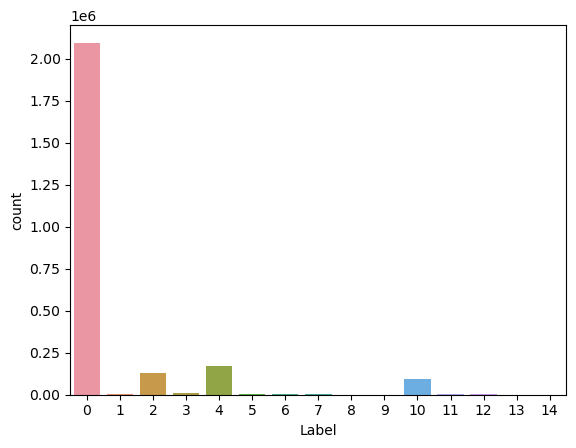

In [8]:
sns.countplot(x=cic_data['Label'])
print(cic_data['Label'].value_counts())

0    2095057
1     425741
Name: binary_label, dtype: int64


<AxesSubplot:xlabel='binary_label', ylabel='count'>

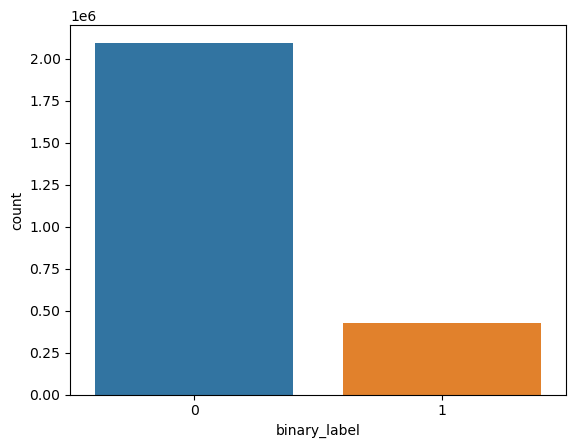

In [9]:
print(cic_data['binary_label'].value_counts())
sns.countplot(x=cic_data['binary_label'])

Skewness of binary_label: 1.7675355395582992


<AxesSubplot:xlabel='binary_label', ylabel='Density'>

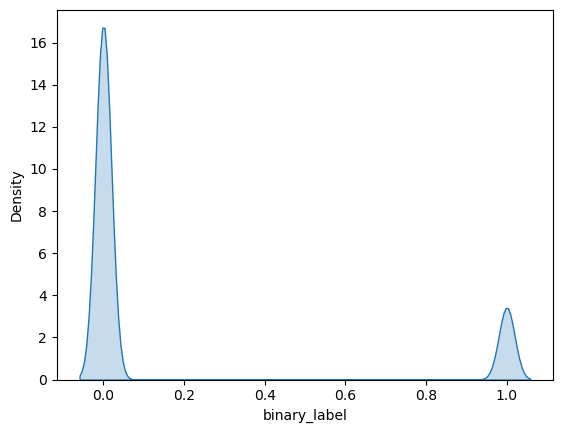

In [15]:
print("Skewness of binary_label:", cic_data['binary_label'].skew())
sns.kdeplot(cic_data['binary_label'], fill=True)

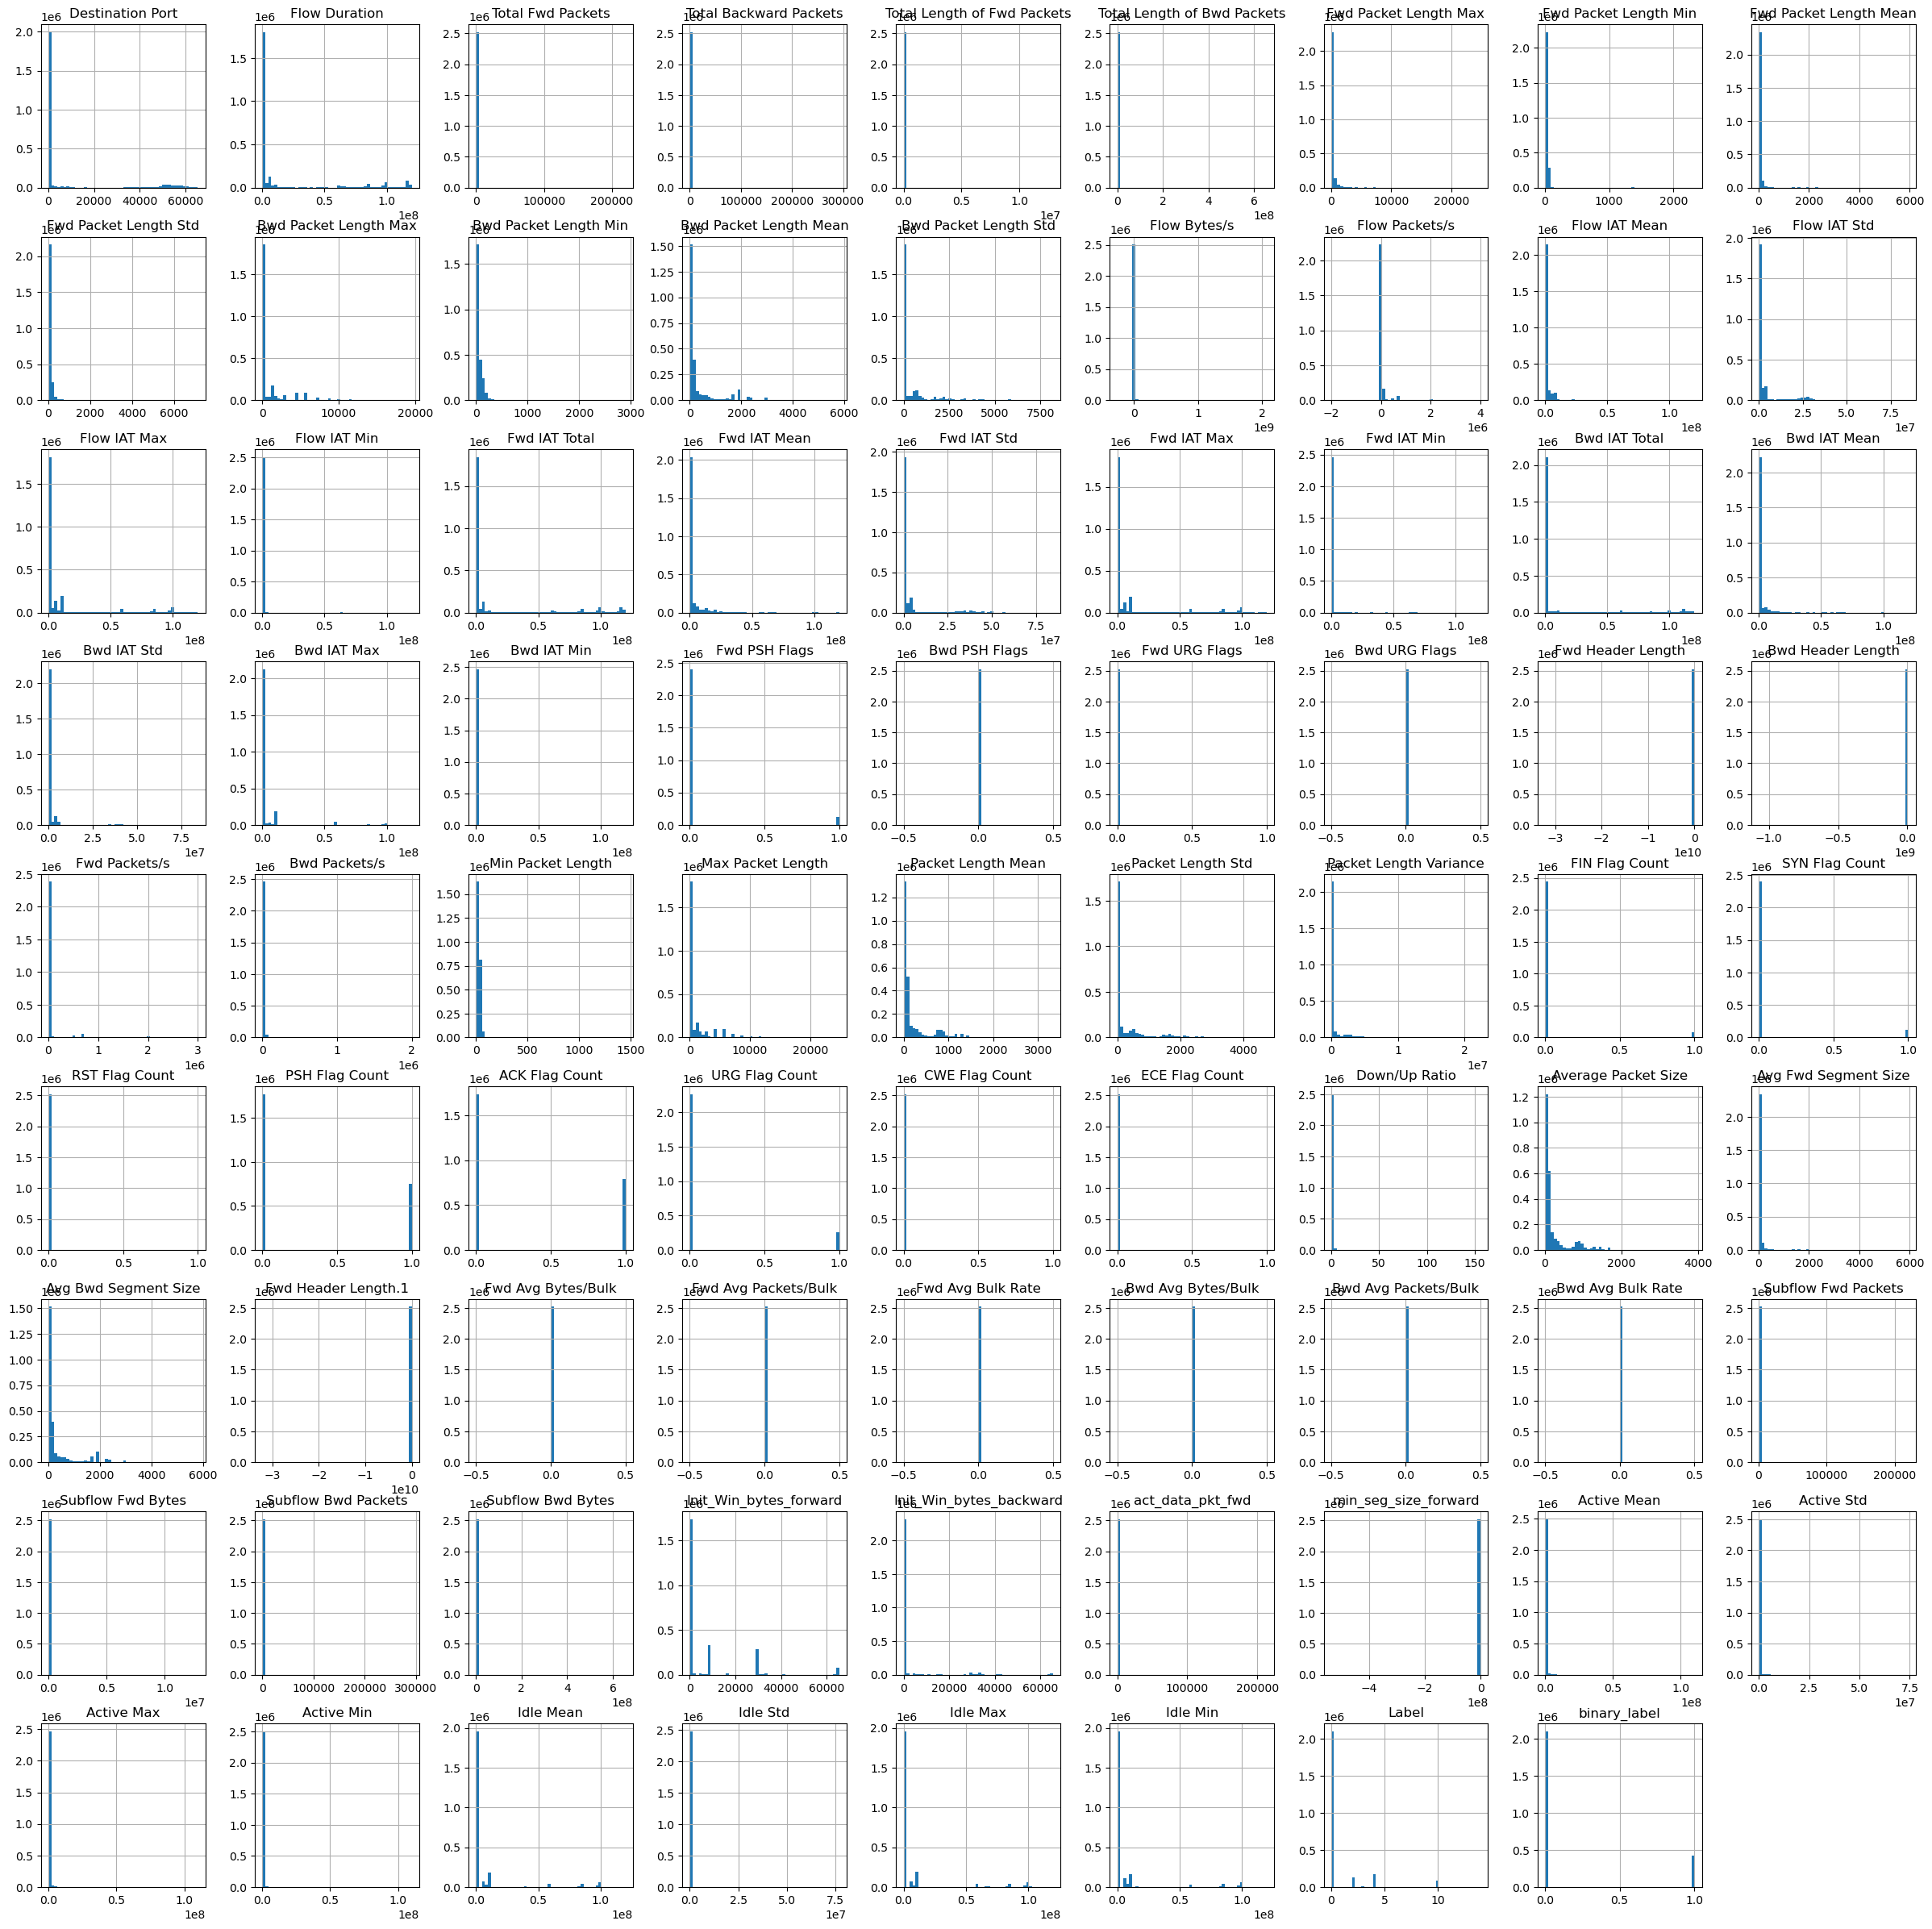

In [16]:
cic_data.hist(bins=50, figsize=(30, 30))
plt.show()

<AxesSubplot:>

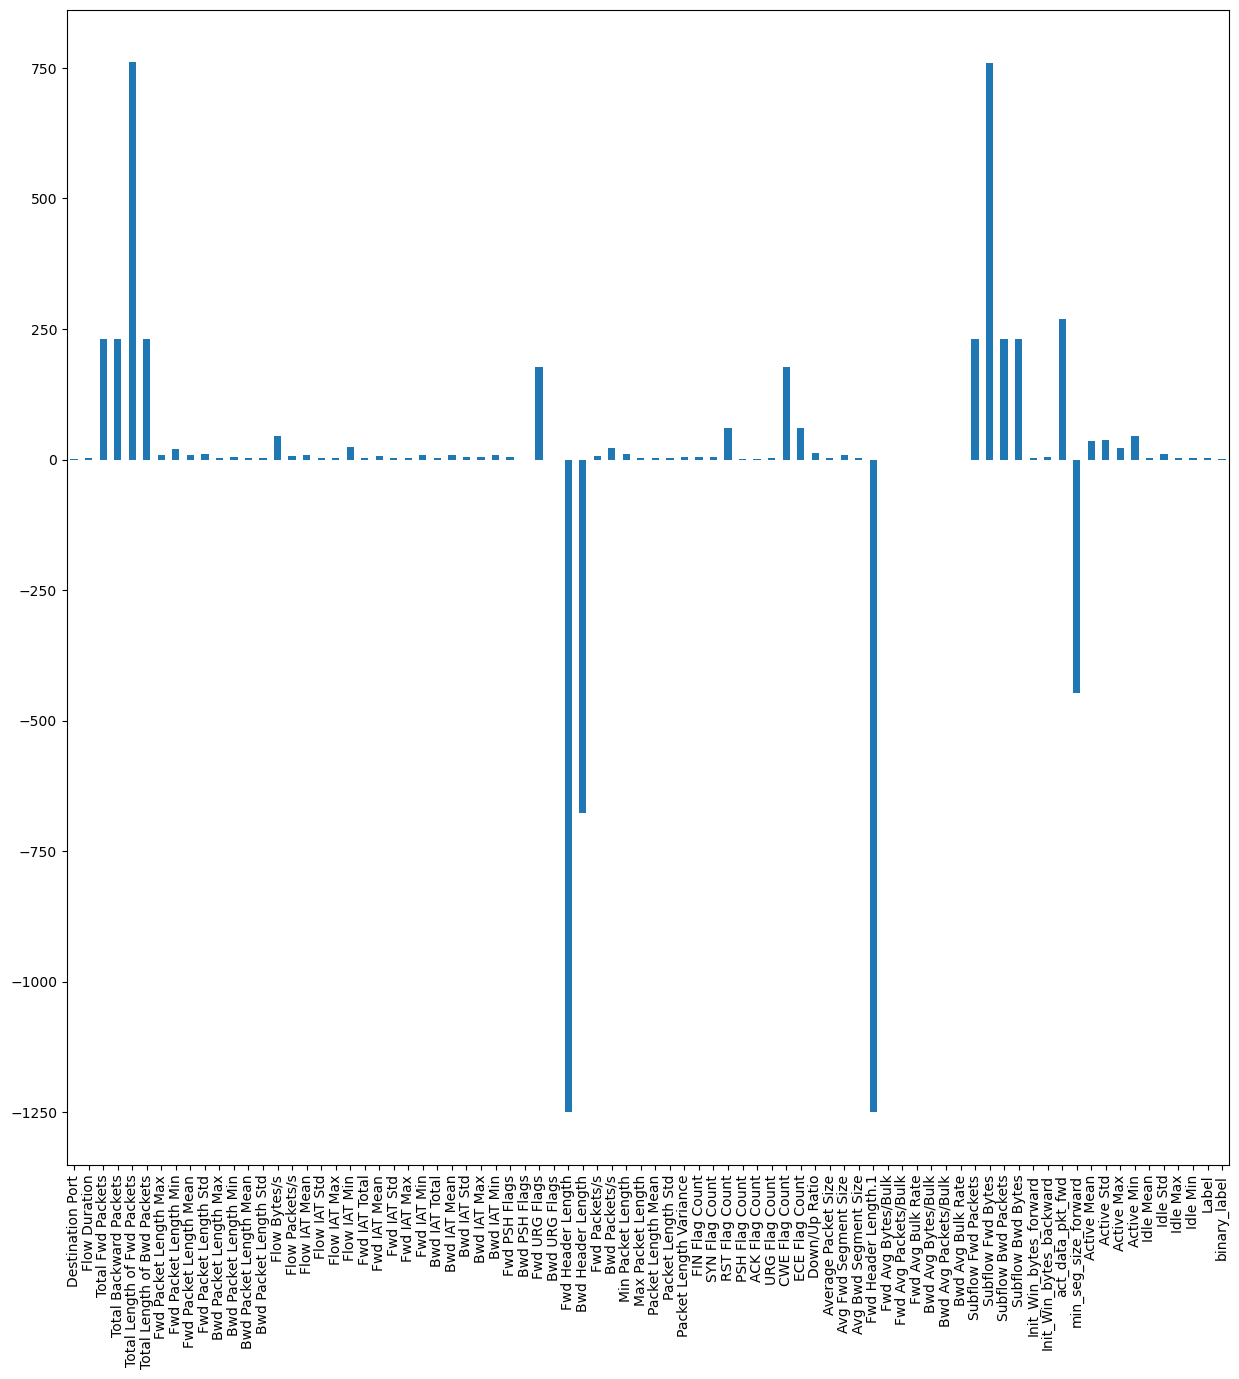

In [17]:
plt.figure(figsize=(15, 15))
cic_data.skew().plot(kind='bar')

Top 20 features most correlated with binary labels:
   1. binary_label: 1.0000
   2. Label: 0.8225
   3. Bwd Packet Length Std: 0.6117
   4. Bwd Packet Length Max: 0.5965
   5. Bwd Packet Length Mean: 0.5944
   6. Avg Bwd Segment Size: 0.5944
   7. Packet Length Std: 0.5735
   8. Max Packet Length: 0.5555
   9. Packet Length Variance: 0.5368
  10. Average Packet Size: 0.5216
  11. Packet Length Mean: 0.5209
  12. Fwd IAT Std: 0.5061
  13. Idle Max: 0.4756
  14. Flow IAT Max: 0.4715
  15. Idle Mean: 0.4709
  16. Fwd IAT Max: 0.4708
  17. Idle Min: 0.4584
  18. Flow IAT Std: 0.4110
  19. Fwd IAT Total: 0.2801
  20. Flow Duration: 0.2790


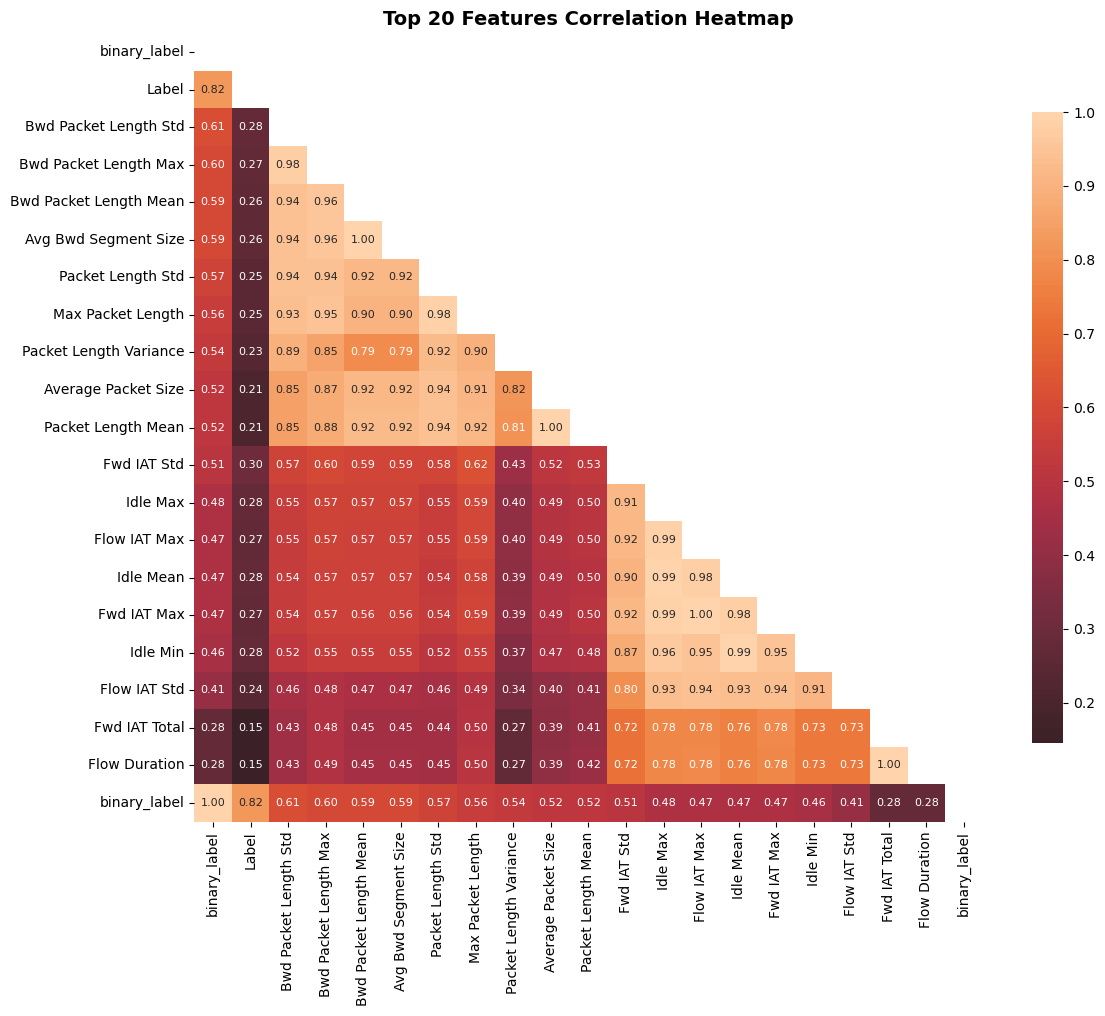

In [18]:
# Calculate correlation matrix
correlation_matrix = cic_data.corr()

# Find top 20 most correlated features with the binary label
binary_correlations = correlation_matrix['binary_label'].abs().sort_values(ascending=False)
top_20_features = binary_correlations.head(21).index.tolist()  # 21 because Label_Binary will be included
top_20_features = [f for f in top_20_features if f != 'label_binary'][:20]  # Remove Label_Binary and take top 20

print(f"Top 20 features most correlated with binary labels:")
for i, feature in enumerate(top_20_features, 1):
    corr_value = binary_correlations[feature]
    print(f"  {i:2d}. {feature}: {corr_value:.4f}")

# Create correlation heatmap for top 20 features
plt.figure(figsize=(12, 10))
top_20_corr = cic_data[top_20_features + ['binary_label']].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(top_20_corr, dtype=bool))

# Plot heatmap
sns.heatmap(top_20_corr, 
            mask=mask,
            annot=True, 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            annot_kws={'size': 8})

plt.title('Top 20 Features Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<AxesSubplot:>

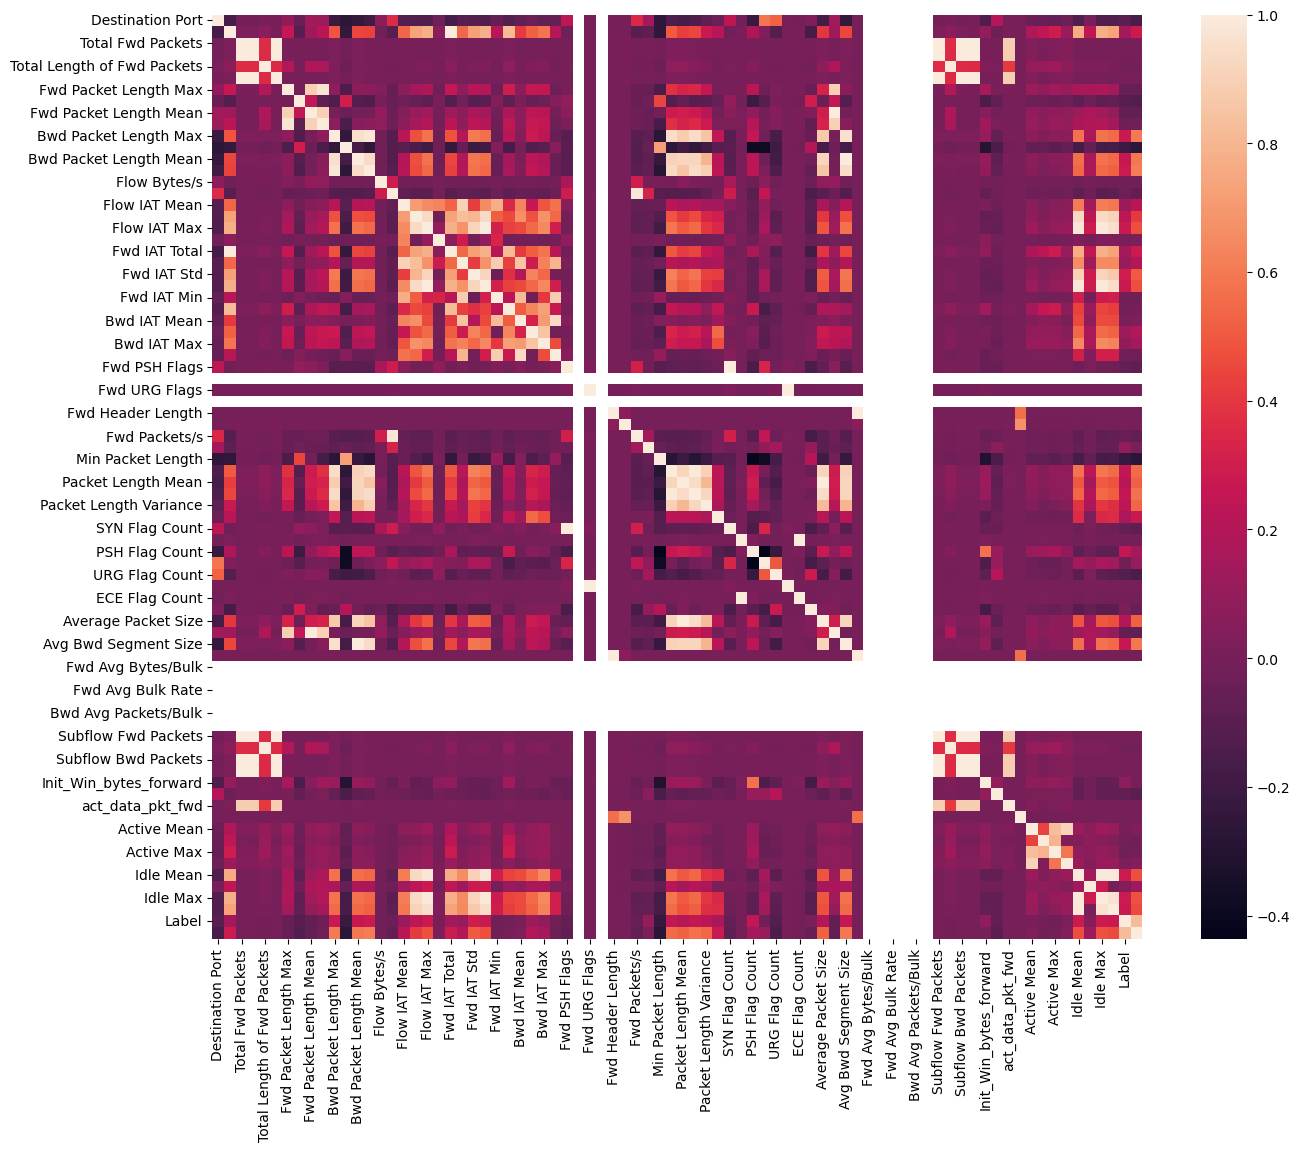

In [22]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix)

C:\Users\bhadr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='binary_label', ylabel='Density'>

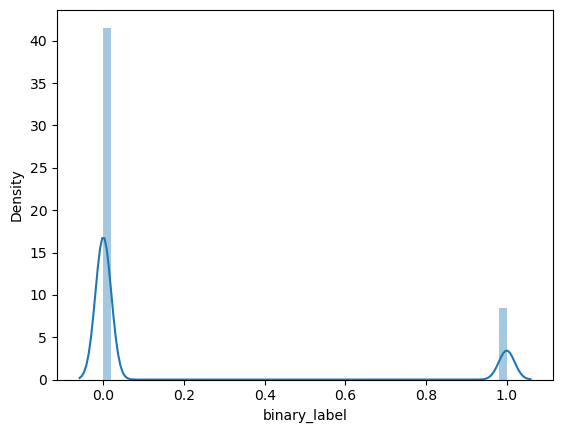

In [17]:
sns.distplot(cic_data['binary_label'], hist = True)